<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 4 - Polynomial Regression</b></center>    
<pre>    

# Importing the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Importing the libraries

In [5]:
df = pd.read_csv("Position_Salaries.csv")

In [6]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


# Plot the data using scatter plot

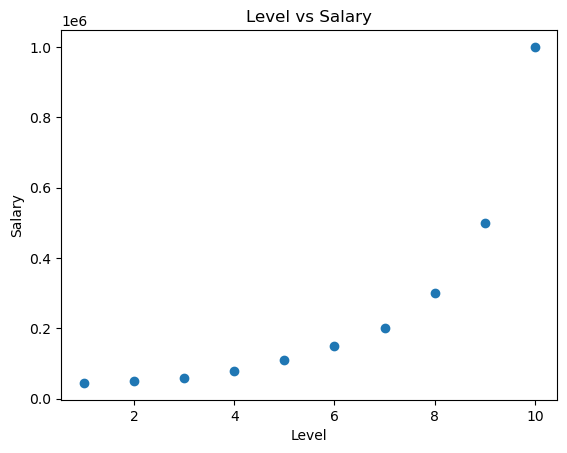

In [8]:
plt.scatter(df["Level"], df["Salary"])
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Level vs Salary")

plt.show()

In [9]:
df[['Level']]

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


# Splitting the dataset into the Training set and Test set

In [11]:
X = df[["Level"]]
y = df["Salary"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [12]:
print("Training set:")
print(X_train)
print(y_train)

print("\nTest set:")
print(X_test)
print(y_test)

Training set:
   Level
9     10
1      2
6      7
7      8
3      4
0      1
5      6
9    1000000
1      50000
6     200000
7     300000
3      80000
0      45000
5     150000
Name: Salary, dtype: int64

Test set:
   Level
2      3
8      9
4      5
2     60000
8    500000
4    110000
Name: Salary, dtype: int64


# Fitting Linear Regression to the dataset

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X_train, y_train)

LinearRegression()

# Predict the x_test using Linear Model

In [17]:
y_pred = lr.predict(X_test)

# Visualising the Linear Regression results

In [19]:
y_pred

array([ 60302.69058296, 555437.21973094, 225347.53363229])

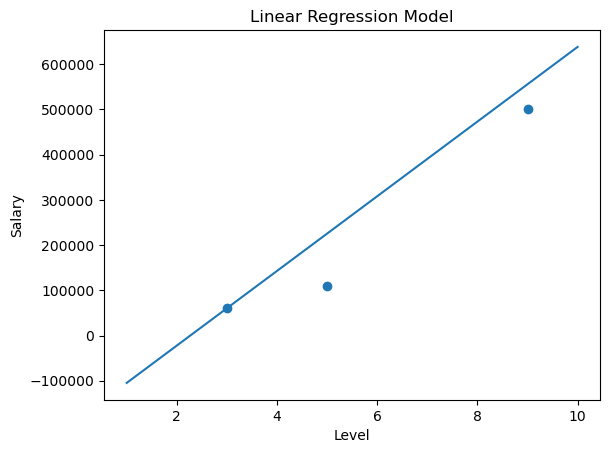

In [20]:
plt.scatter(X_test, y_test)

plt.plot(X, lr.predict(X))
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Linear Regression Model")

plt.show()

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5    
print(rmse)

73888.27256549196


# Fitting Polynomial Regression to the dataset

## import  PolynomialFeatures

In [25]:
from sklearn.preprocessing import PolynomialFeatures

## create PolynomialFeatures of degree 4

In [27]:
poly = PolynomialFeatures(degree=4)

## Apply fit_transform to features

In [29]:
x_poly = poly.fit_transform(X_train)

## View new  Features

In [31]:
x_poly

array([[1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03]])

## Fitting Polynomial Regression to the dataset

In [33]:
poly_reg = LinearRegression()

In [34]:
poly_reg.fit(x_poly, y_train)

LinearRegression()

# Create Grid for higher resolution and smoother curve

# Predict the x_test using Polynomial Regression

In [39]:
X_test

,Level
2,3
8,9
4,5


In [41]:
poly.fit_transform(X_test)

array([[1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02]])

In [43]:
y_poly_predict = poly_reg.predict(poly.fit_transform(X_test))

# Visualising the Linear Regression results

In [45]:
y_test

2     60000
8    500000
4    110000
Name: Salary, dtype: int64

In [47]:
y_pred

array([ 60302.69058296, 555437.21973094, 225347.53363229])

In [49]:
y_poly_predict

array([ 63555.47530093, 552670.08013592, 117231.50005646])

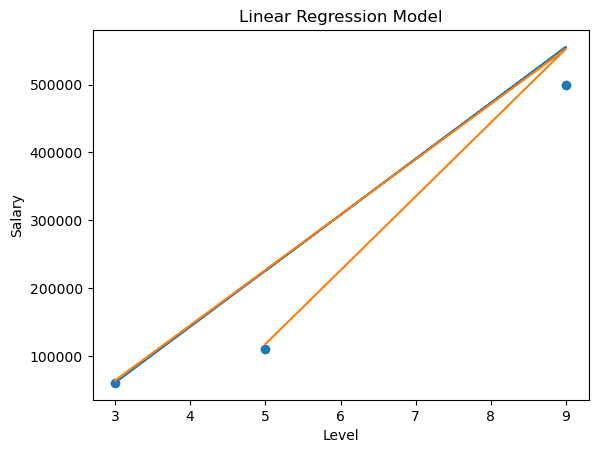

In [55]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.plot(X_test, y_poly_predict)
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Linear Regression Model")

plt.show()